# Introduction 

## What is Customer Churn? 

Customer churn is expressed by Churn rate, a business metric, that calculates the number of customers who left your product over a given period of time, divided by total number of customers. It is vital to understand the health and stickness of a business. Your company may define your calculation differently than I stated, but they key is to dip into your metrics and understand how and why of your churn because that is how you will be able to take action decisions to improve your customer rentation rate. 


## How Customer Churn is used?

Churn Rate will affect your revenue, customer lifetime value, and customer acqusition rate because you lose customers, you lose revenue from them and the opportunity to secure cost back from them. 

Here are some useage of Customer Churn Rate: 

1. Meaure the company's health and long term prospects 
2. Meaure whether your company is improving customer retention 
3. Calculate customer life time 
4. Identify changes made by the company that affects on customer rentention 
5. Forcasting company's future performance 

## Dateset Overview 

I will be working with Telco Customer Churn dataset from Kaggle containing information about 7,043 customers. Each row of the dataset represents a customer and each column contains customer's attributes.

Here is the description of each attribute:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

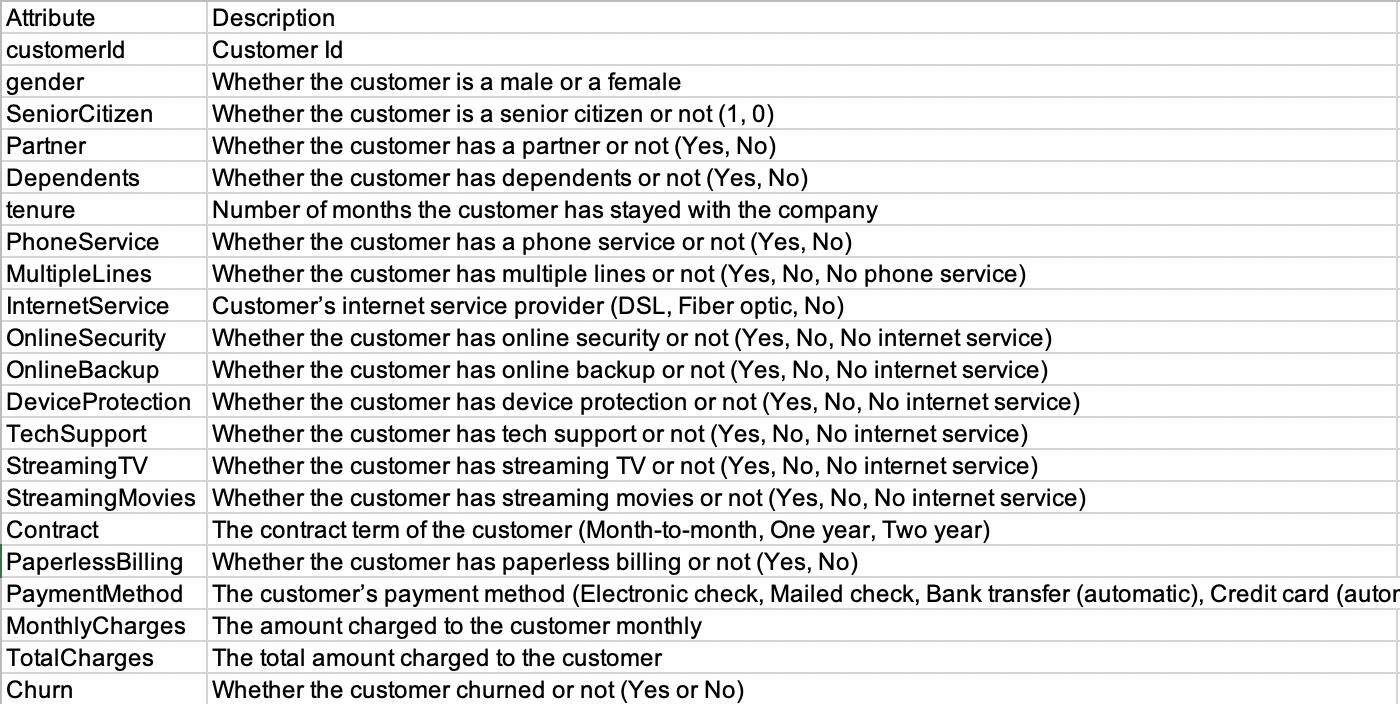

## Objectives: 

**EDA:** 

I will explore the data and try to answer questions like bleow: 
* What's the % of Churn Customers and customers that stay with the service? 
* Any patterns/preference in Churn Customers based on customer demographic and the type of service provided?
* What's the most profitable service types? 
* Any other questions that will raise throughout the exploration 

**Modeling**

After EDA, I will build a pipeline to find a model that can best fit the datasets and predict churn or not with performance valuation of the models 

Let's get started. Hope you enjoy the kernel! 




# Importing Librares & Dataset

In [6]:
import pandas as pd #table manipulations 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt #data visulization 
%matplotlib inline 
import scipy as stats #statistic library 

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.svm import SVC





In [7]:
df = pd.read_csv('Telco-Customer-Churn.csv') #import dataset 

# Exploratory Data Analysis 

## Data Cleaning & Transformation 

In [8]:
df.head() # every customer is labled with Churn Yes or No 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape # exactly 7043 customers data and 21 attributes of them 

(7043, 21)

In [10]:
df.info() #some datatype are not correct such as seniorcitize and Total charge.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# some customers did not stay with the service for a month, but monthly charges is 18.25. Looks suspicious. 
df[df['tenure'] == 0] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the data above, we know that there are 11 new customers who just joined the telecom service and signed contract for one or 2 years. And, the Totalcharges are empty for those customers. I would fill them in Monthly charges since this is what they would be charged by the end of the month. 

In [13]:
#fill in empty values 
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
df[df['tenure'] == 0] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [14]:
#convert date type 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We notice that some of the attributes such as DeviceProtection have redundant values like No,No internet service or No phone service. We can combine those to make it easier for classifier later. 

In [15]:
categorical_feature_for_replacement  = ['PhoneService','MultipleLines','OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in categorical_feature_for_replacement:
    df[i] = df[i].replace({'No internet service' : 'No'})
  
    df[i] = df[i].replace({'No phone service' : 'No'})


Some customers have much higher Monthly charges than that of others. Let's see if the cause is the more service  provided to them or it is an error by mistake. 

In [16]:
high_cost = df[df['MonthlyCharges'] > 100]
high_cost['MultipleLines'].value_counts()

Yes    778
No     124
Name: MultipleLines, dtype: int64

In [17]:
high_cost['StreamingTV'].value_counts()

Yes    877
No      25
Name: StreamingTV, dtype: int64

In [18]:
low_cost = df[df['MonthlyCharges'] <= 100]
low_cost['StreamingTV'].value_counts()

No     4311
Yes    1830
Name: StreamingTV, dtype: int64

In [19]:
1830/len(low_cost)

0.2979970688812897

In [20]:
low_cost['MultipleLines'].value_counts()

No     3948
Yes    2193
Name: MultipleLines, dtype: int64

In [21]:
2193/len(low_cost)

0.35710796287249635

In general, MultipleLines and StreamingTV cost customers a lot for monthly payment. I can see that 86% of high-pay customers(threshhold is 100) have multiplelines and 97% of them have StreamingTV. And, for low-pay customers, only about36% of them has multiplelines and 30% of them has streamingTv service. Therefore, I can conclude that it is hardly likely the high charge amount is an error.  

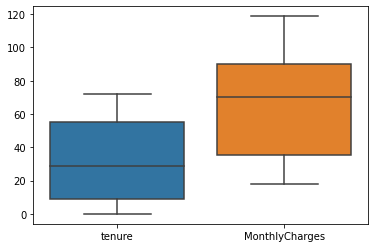

In [22]:
sns.boxplot(data = df[['tenure','MonthlyCharges']]) #No outliers 

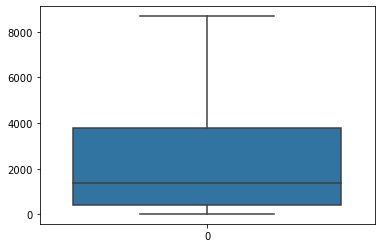

In [23]:
sns.boxplot(data = df['TotalCharges'])#no outliers 

## 1.1 Target Variable 

We are trying to predict whether a customer will churn based on the characteristic and behaviors of customers who left within last month. Therefore, we have a binary classification problem with mild imbalance dataset. 

* Churn Yes: 27%
* Churn No: 73%
* lost 31% of monthly revenue after customer left the service 

Note that before fitting data into classification models, we need to oversample minority class to make the target variable balance. The reason is that the imbalance class creates a bias where the machine learning model tends to predict the majority class. We don’t want the prediction model to ignore the minority class because the minority class, Churnned Customer, is what we have the most concern. 

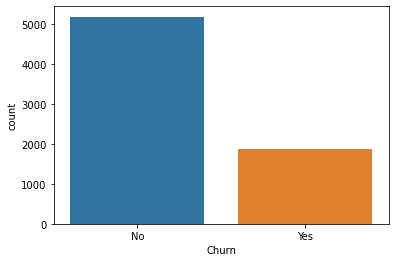

In [24]:
sns.countplot('Churn', data = df)

In [25]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
1869/(1869 + 5174)

0.2653698707936959

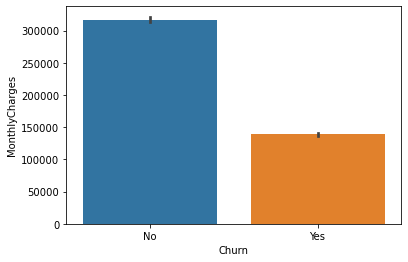

In [27]:
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df,estimator = np.sum)#lose 31% of total revenue 

## 1.2 Numerical Features 

The datasets only has three numerical features. We can use kdeplot function to display the probability distribution of tenure,MonthlyCharges,Totalcharges features. 

* Tenure: Recent customers are more likely churn
* Monthly Charges: Customers with higher monthly charges are more likely churn, especially charges between 65 and 110. 

Therefore, we know that tenure and Monthly charges are important features for the prediction of churn 

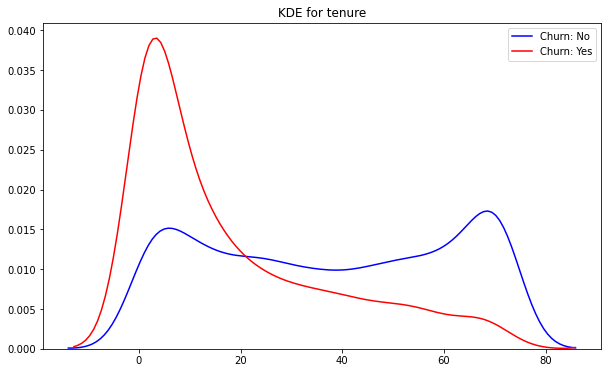

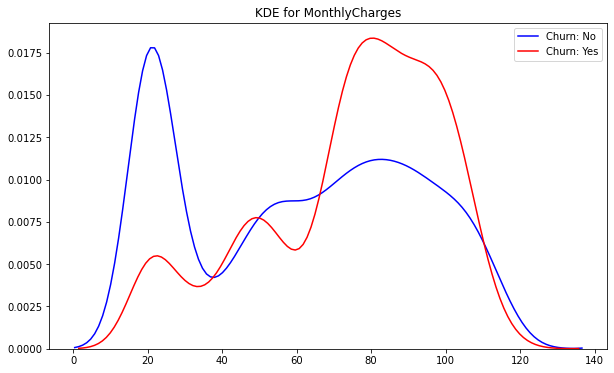

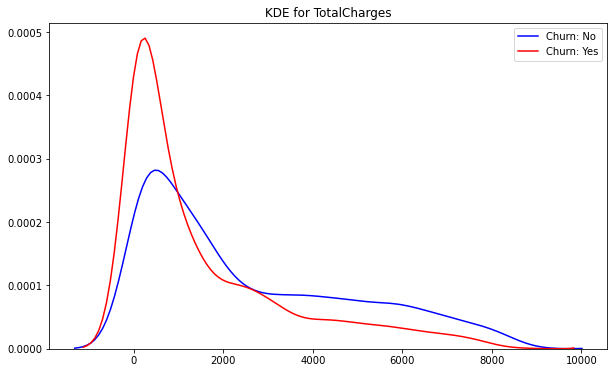

In [28]:
def kdeplot(feature):
    plt.figure(figsize=(10, 6))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature], color= 'blue', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature], color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

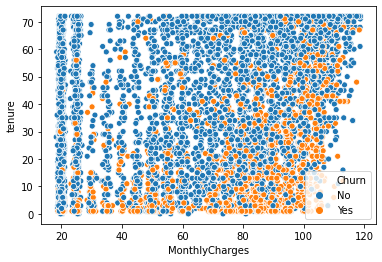

In [29]:
sns.scatterplot(x = 'MonthlyCharges', y = 'tenure', data = df, hue = 'Churn')


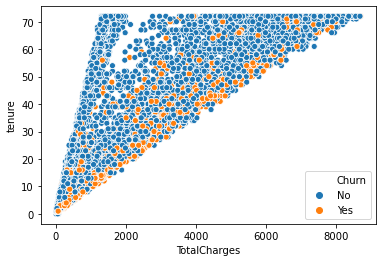

In [30]:
sns.scatterplot(x = 'TotalCharges', y = 'tenure', data = df, hue = 'Churn')

I took a guess that Total Charges is the product of monthly charges and tenure. However, I was wrong about that because there is slightly difference between the two. Still, it worths to enginer a new feature and see how would it affect users' churn. 

In [31]:
df['Charge'] = df['TotalCharges'] / df['tenure'] # Note we need to exlude our new customers whoes tenure is 0 
df[['MonthlyCharges', 'Charge']] #difference discovered 


,MonthlyCharges,Charge
0,29.85,29.850000
1,56.95,55.573529
2,53.85,54.075000
3,42.30,40.905556
4,70.70,75.825000
...,...,...
7038,84.80,82.937500
7039,103.20,102.262500
7040,29.60,31.495455
7041,74.40,76.650000


In [32]:
df['charge_diff'] = df['MonthlyCharges'] - df['Charge']
mean_diff = df.groupby('Churn').agg({'charge_diff' : ['max','mean']})
mean_diff # charge_diff may not have much influence on customers churn 

charge_diff          
              max      mean
Churn                      
No         17.025      -inf
Yes        19.125  0.008178

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


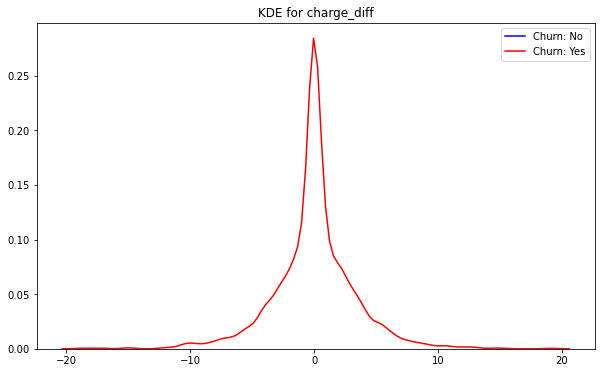

In [33]:
kdeplot('charge_diff') # People who did not leave the service has nearly no variance. 

# 2.1 Categorical Features

Since the datasets have 16 categorical features, I will analyze 2 features at a time. 
* 12 binary features (Yes or No) 
* 3 features with 3 unique variable 
* 1 features with 4 unique variable 


## 2.1.1 Gender & Age

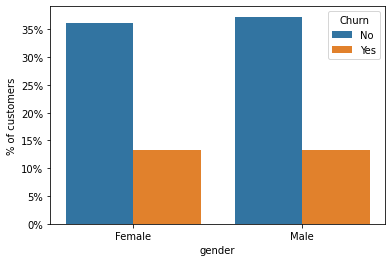

In [34]:
def barplot_percentages(feature, orient='v', axis_name="% of customers"):
    
    tem = df.groupby(feature)["Churn"].value_counts().to_frame()
    tem = tem.rename({"Churn": axis_name}, axis=1).reset_index()
    tem[axis_name] = tem[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=tem, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=tem, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

barplot_percentages("gender")#Gender is not an indicator of customer churn 

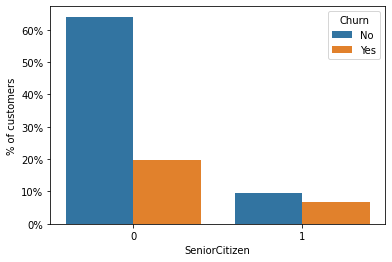

In [35]:
barplot_percentages("SeniorCitizen")#senior citizen has only about 16% of customer base but more than half of them churned

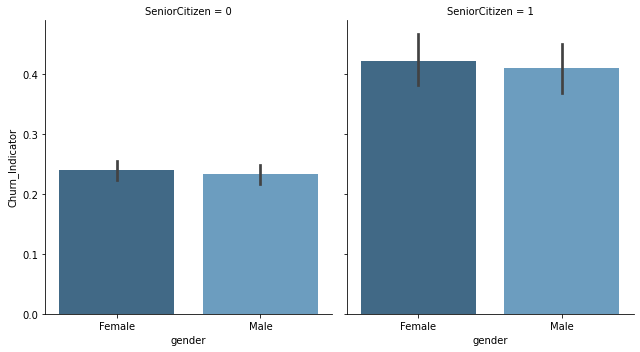

In [36]:
df['Churn_Indicator'] = df['Churn'].replace("No", 0).replace("Yes", 1)
tem = sns.FacetGrid(df, col="SeniorCitizen", height=5, aspect=.9)
graph = tem.map(sns.barplot, "gender", 'Churn_Indicator', palette = "Blues_d", order= ['Female', 'Male'])

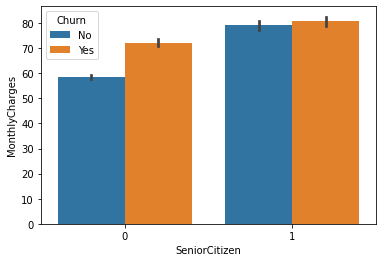

In [37]:
sns.barplot(x = 'SeniorCitizen', y = 'MonthlyCharges', data = df, hue = 'Churn',estimator = np.mean)

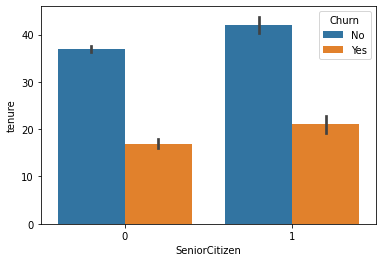

In [38]:
sns.barplot(x = 'SeniorCitizen', y = 'tenure', data = df, hue = 'Churn',estimator = np.mean)

What we Learned From Gender & Age: 
* Gender is not an indicator of Churn 
* Senior Citizen(Age) may be an important indicator of Churn because more than half of senior citizen churned last month. 
* Churned Customers,not belonging to senior citizen group, had about $15 average monthly payment more than non-churned customer in the same age group. 

## 2.1.2 Dependents & Partner

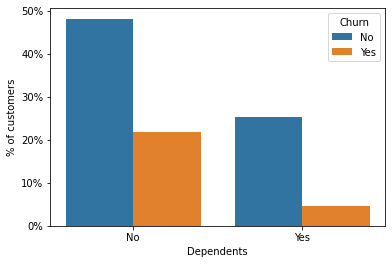

In [39]:
# Plot Dependents column
barplot_percentages('Dependents')


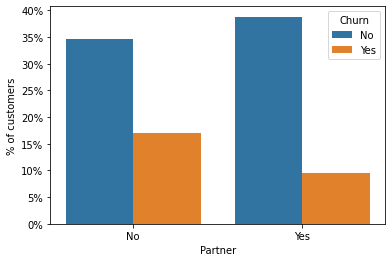

In [40]:
#plot partner column 

barplot_percentages('Partner') 


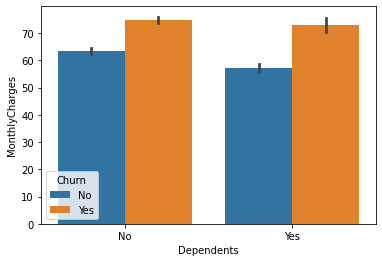

In [41]:
sns.barplot(x = 'Dependents', y = 'MonthlyCharges', data = df, hue = 'Churn',estimator = np.mean)

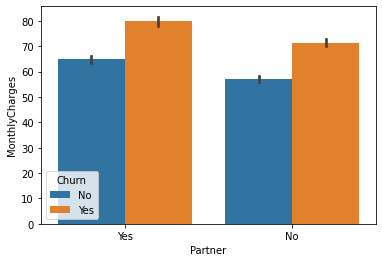

In [42]:
sns.barplot(x = 'Partner', y = 'MonthlyCharges', data = df, hue = 'Churn',estimator = np.mean)

What we learned: 
* Customers who do not have dependents are more likely to churn 
* Customers who do not have partner are more likely to churn as well 
* No matter a customer has partner or dependents, the monthly charged for churned customer is higher than that of customers who stay with the service 

## 2.2.3 Phone service & Internet service 

We have explored and analyzed customer demograpphic attributes in the dataset. Now, we need to explore customer service attributes. There are two main service type, one is phone service and internet service. And, both of them have additional service such as multiplelines,online backup. 

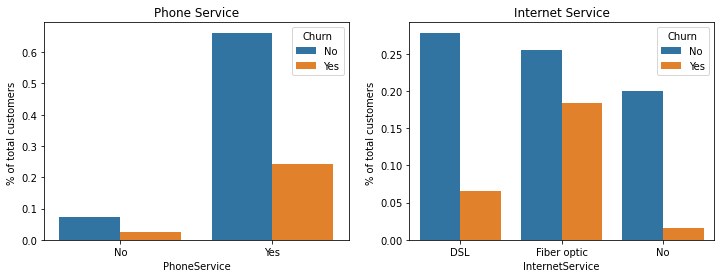

In [43]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Phone Service")
axis[1].set_title("Internet Service")
axis_y = "% of total customers "
# Plot Phone Service
gp_partner = df.groupby('PhoneService')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='PhoneService', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('InternetService')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

#Customer with Fiber optic of internet service is more likely to churn. 
#Majority of customer has phone service 

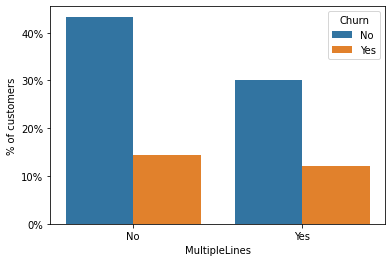

In [44]:
barplot_percentages('MultipleLines') # customer who have multiplelines is slightly likely to churn. 

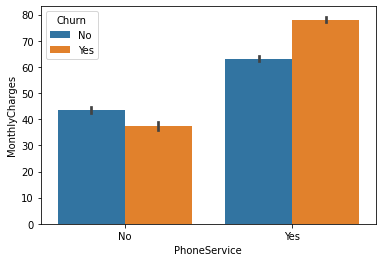

In [45]:
sns.barplot(x = 'PhoneService', y = 'MonthlyCharges', data = df, hue = 'Churn',estimator = np.mean)

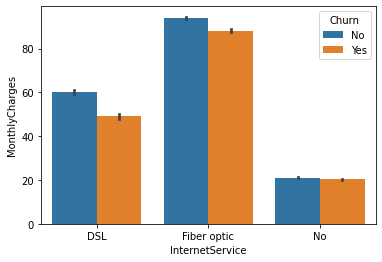

In [46]:
sns.barplot(x = 'InternetService', y = 'MonthlyCharges', data = df, hue = 'Churn',estimator = np.mean)

What we learned: 
* Customer with Fiber optic of internet service is more likely to churn. 
* The majority of customer has phone service 
* Customer with multiplelines is slightly likely to churn 
* Fiber optic internet service cost the most and is a strong indicators of customer churn. 
* Note that customers who use DSL and Fiber optic with lower charges are more likly to churn. 

## Additional Internet Services 

We have six internet service distribution displayed. 

What we learned: 
* Customers has any of these service such as OnlineSercurity,OnlineBackup,DeviceProtection,and TechSupport are less likely to churn. 
* Streaming TV and streaming Movies are not indicators of churn rate 


In [47]:
service_feature = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

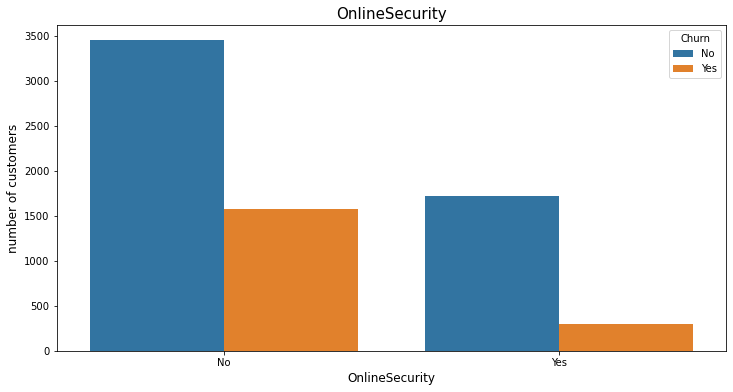

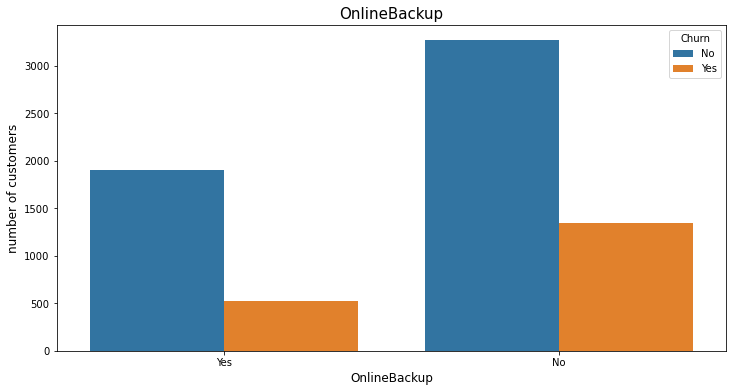

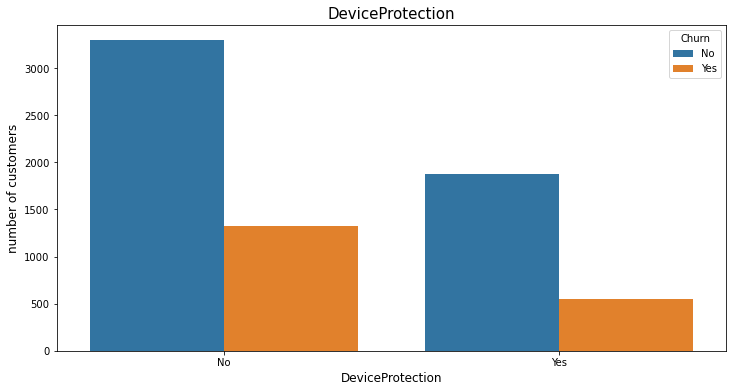

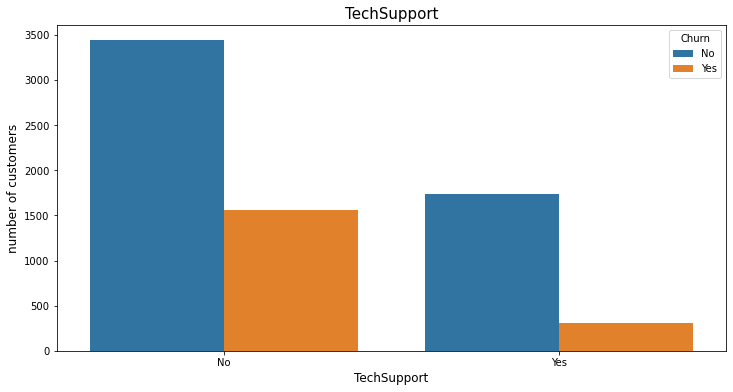

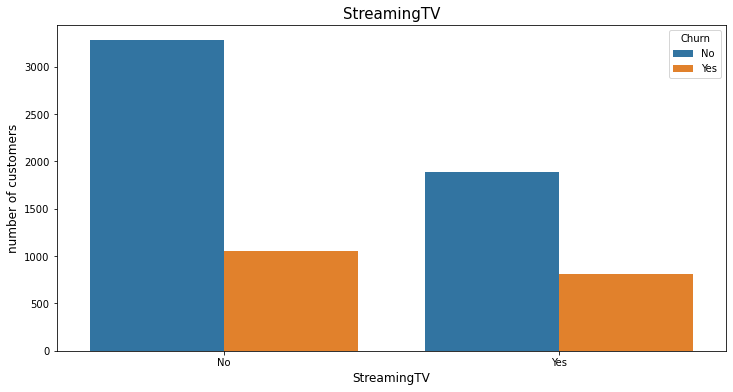

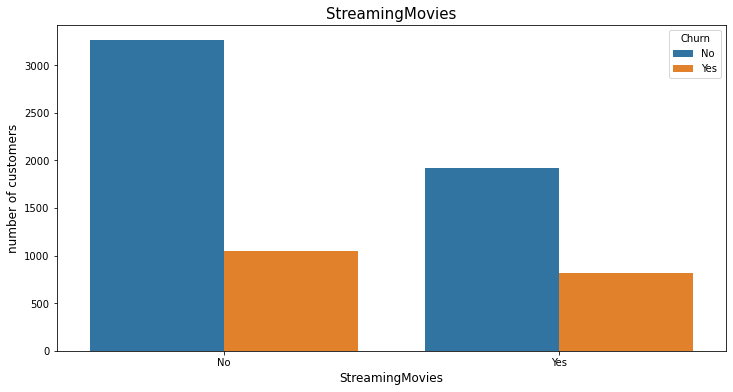

In [48]:
for i in service_feature: 
    plt.figure(figsize = (12,6))
    sns.countplot(x = i, hue = 'Churn', data = df)
    plt.title(i,size = 15)
    plt.ylabel('number of customers',size = 12)
    plt.xlabel(i,size = 12)
    plt.show()


## 2.2.4 Customer Account Information 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are three customer account attributes such as Contract, PaperlessBilling and PaymentMethod. 

Let's first explore Contract attributes in 3 different internet service. 

## Contract 

In [50]:
df['Contract'].value_counts() # more customers chose month to month 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x576 with 0 Axes>

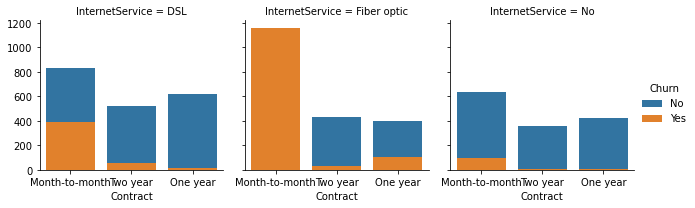

In [51]:
plt.figure(figsize = (15,8))
G = sns.FacetGrid(data = df, col = 'InternetService', hue = 'Churn')
(G.map(sns.countplot, 'Contract')).add_legend()

#Customer with month to month contract is more likly to churn
# All customers with Fiber optic service and monthly contract left within last month 


## PaperlessBilling & Paymend Method 

What we leared: 
* Customer who pay monthly and use paperless billing service is more likly to churn 
* Customer who pay electronic check is likely to churn 
* Customer who pay with mailcheck method is charged lower than others 
* Regarding mailcheck method, we can see that there is a large gap in charges between churnned and not chunned customers. 



In [52]:
df['PaperlessBilling'].value_counts() #Majority customers use paperlessbilling 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [53]:
df['PaymentMethod'].value_counts() #majority customers use electronic check 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<Figure size 1224x432 with 0 Axes>

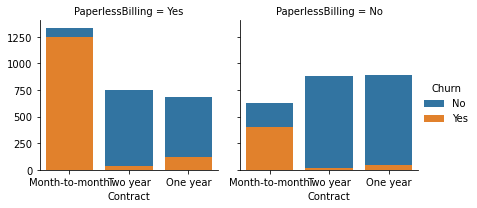

In [54]:
plt.figure(figsize = (17,6))
G = sns.FacetGrid(data = df, col = 'PaperlessBilling', hue = 'Churn')
(G.map(sns.countplot, 'Contract')).add_legend() # paperlessbilling with Monthly payment is more likely to churn than no paperlessBilling 

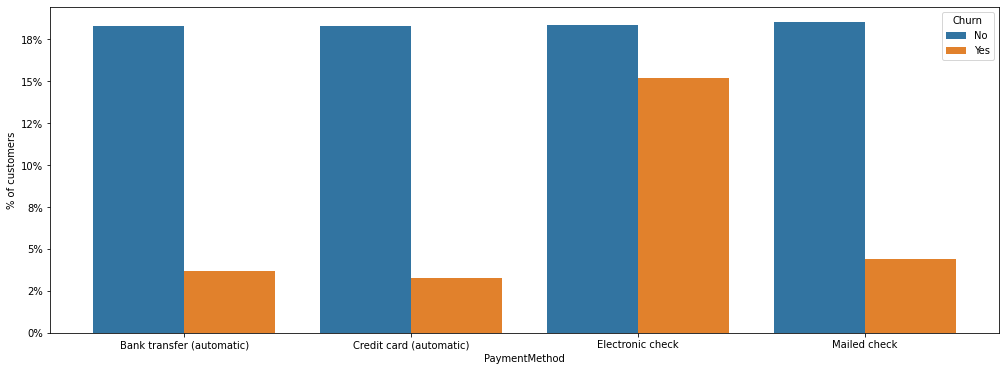

In [55]:
plt.figure(figsize=(17,6))
barplot_percentages("PaymentMethod") #Customers with electronic check is more likely to churn 

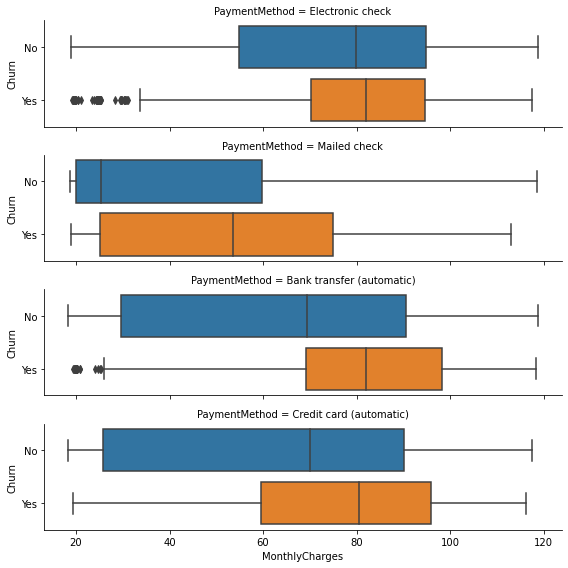

In [56]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=2, aspect=4, orient='h')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3.  Data Preprocessing & Feature Selection 

* So far, we learnt some variables are more important than others such as 'SeniorCitizen','dependents','partner','InternetService''Monthly Charges','tenure'. I would first drop the unrelated variables. 
* For categorical attributes, we need to perform one-hot coding for binary features and Lable encoder for non-binary features so that machine learning models can understand our data. 

* For numerical features, since the units of monthlycharges and tenure are different and distributions of them are not normal, I would standardize numerical features so that the distributions of numerical features have standard deviation of 1 and mean of 0. This will help our models such as linear regression perform better. 



## One hot coding & Labeling - Catogorical Attributes 

In [58]:
#Drop numerical col & Nonindicators 
df_tem = df.copy()
df_cat = df_tem.drop(['customerID','Churn_Indicator','PhoneService','charge_diff','TotalCharges','tenure','Charge','MonthlyCharges','gender','StreamingTV','StreamingMovies','MultipleLines'],axis = 1)

In [59]:
# One-hot encode
onehot = ['SeniorCitizen','Dependents','Churn','Partner','TechSupport','PaperlessBilling','OnlineBackup','OnlineSecurity','DeviceProtection']
df_dum= pd.get_dummies(df_cat[onehot])

#Drop one of the dummy variable for every feature to avoid multicollinearity problem 
df_dum


,SeniorCitizen_0,SeniorCitizen_1,Dependents_No,Dependents_Yes,Churn_No,Churn_Yes,Partner_No,Partner_Yes,TechSupport_No,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes
0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
2,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1
4,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1
7039,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
7040,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0
7041,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0


In [60]:
#LabelEncoding non-binary categorical features 
from sklearn.preprocessing import LabelEncoder
for i in df_cat.columns:
    if i not in onehot: 
        lbl = LabelEncoder()
        lbl.fit(df_cat[i])
        df_cat[i] = lbl.transform(df_cat[i])
df_cat = df_cat.drop(onehot,axis = 1)


In [61]:
#Drop one of the dummy variable for every feature to avoid multicollinearity problem 
drop = ['SeniorCitizen_1','Partner_No','Dependents_No','Churn_Yes','TechSupport_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','PaperlessBilling_No']
df_dum = df_dum.drop(drop,axis = 1)
df_dum

,SeniorCitizen_0,Dependents_Yes,Churn_No,Partner_Yes,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,DeviceProtection_Yes
0,1,0,1,1,0,1,1,0,0
1,1,0,1,0,0,0,0,1,1
2,1,0,0,0,0,1,1,1,0
3,1,0,1,0,1,0,0,1,1
4,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,0,1,1
7039,1,1,1,1,0,1,1,0,1
7040,1,1,1,1,0,1,0,1,0
7041,0,0,0,1,0,1,0,0,0


In [62]:
#merge all categorical data 
df_new = df_cat.merge(df_dum,left_index = True, right_index = True)

In [63]:
#merge to original dataset
num_cat = ['TotalCharges','tenure','MonthlyCharges']
for i in df.columns: 
    if i not in num_cat: 
        df.drop(i, axis = 1, inplace = True)
df = df.merge(df_new,left_index = True, right_index = True)
df.head()

,tenure,MonthlyCharges,TotalCharges,InternetService,Contract,PaymentMethod,SeniorCitizen_0,Dependents_Yes,Churn_No,Partner_Yes,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,DeviceProtection_Yes
0,1,29.85,29.85,0,0,2,1,0,1,1,0,1,1,0,0
1,34,56.95,1889.50,0,1,3,1,0,1,0,0,0,0,1,1
2,2,53.85,108.15,0,0,3,1,0,0,0,0,1,1,1,0
3,45,42.30,1840.75,0,1,0,1,0,1,0,1,0,0,1,1
4,2,70.70,151.65,1,0,2,1,0,0,0,0,1,0,0,0


In [64]:
#Rename Target Variable 
df.rename(columns = {'Churn_No': 'Churn'}, inplace = True)
#Drop highly correlated feature determined before 
df = df.drop('TotalCharges',axis = 1)


## Numerical Features 
Three numerical features distributions are displayed. We need to 

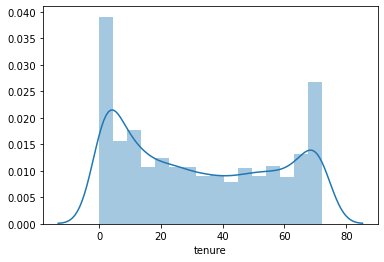

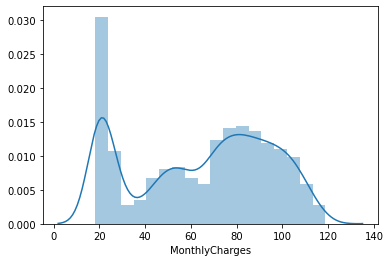

In [65]:
num = ['tenure','MonthlyCharges']
for i in num: 
    sns.distplot(df[i])
    plt.show()

## Standardizing Numeric Attributes 


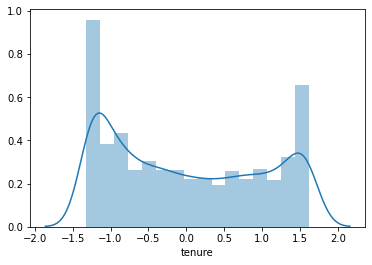

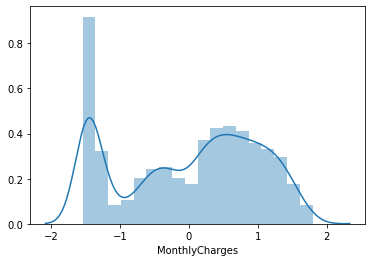

In [66]:
#Scalling numerical columns 
from sklearn.preprocessing import StandardScaler 
num = ['tenure','MonthlyCharges']
ss = StandardScaler ()
df[num] = ss.fit_transform(df[num])

for i in num:
    sns.distplot(df[i])
    plt.show()


In [67]:
df.describe() #numerical features have std of nearly 1 and mean of nearly 0 

,tenure,MonthlyCharges,InternetService,Contract,PaymentMethod,SeniorCitizen_0,Dependents_Yes,Churn,Partner_Yes,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,DeviceProtection_Yes
count,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,5.945991e-17,-8.291599e-17,0.872923,0.690473,1.574329,0.837853,0.299588,0.734630,0.483033,0.290217,0.592219,0.344881,0.286668,0.343888
std,1.000071e+00,1.000071e+00,0.737796,0.833755,1.068104,0.368612,0.458110,0.441561,0.499748,0.453895,0.491457,0.475363,0.452237,0.475038
min,-1.318165e+00,-1.545860e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.516817e-01,-9.725399e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.372744e-01,1.857327e-01,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,9.214551e-01,8.338335e-01,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.613701e+00,1.794352e+00,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection 

* I preliminarily filtered out some non-indicators of features after EDA, but we still have 13 features left as potential indicators. 
* To aviod "OverFitting" and simplify our models, I will perform chi2 test to remove highly related categorical features and use tree classifiers to select top 5 best features for modeling. 
* Note that we need to split dataset first into training dataset and testing dataset and then perform feature selections method in traning dataset to prevent data leakage。 




## Spliting the datasets

In [68]:
#Split data into train and test sets 
y = df['Churn']
X = df.drop('Churn', 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.7, random_state=42)

## Chi-Square Test
**Define Hypothesis**
* Null Hypothesis (H0): Two variables are independent.
* Alternate Hypothesis (H1): Two variables are not independent.

Let's set alpha to 0.05. When P value is smaller than alpha, then we fail to reject H0 meaning that we could use the features in model training.(Note that we donot have to use all) 

In [69]:
#Define Hypothesis
#Null Hypothesis (H0): Two variables are independent.
#Alternate Hypothesis (H1): Two variables are not independent.

from sklearn.feature_selection import chi2

chi_x = X.drop(['tenure','MonthlyCharges'],1)

chi_scores = chi2(chi_x,y)
# here first array represents chi square values and second array represnts p-values
chi_scores

(array([   9.82102823, 1115.78016697,   58.49225048,   26.00058705,
         133.03644288,   82.41208264,  135.55978269,  105.680863  ,
          31.21769402,  147.29585791,   20.2266622 ]),
 array([1.72527862e-003, 1.22794132e-244, 2.04093269e-014, 3.41313557e-007,
        8.87672856e-031, 1.10476396e-019, 2.49054941e-031, 8.66198711e-025,
        2.30654124e-008, 6.76169598e-034, 6.87875040e-006]))

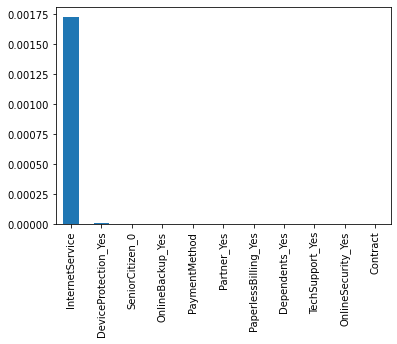

In [70]:
# All P_values are all very small indicating that all of these features can be used for model training 
p_values = pd.Series(chi_scores[1],index = chi_x.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

## Feature Selection Using ExtraTreesClassifier

[0.25753885 0.25265367 0.05352618 0.09884638 0.08070197 0.02645393
 0.02719983 0.037776   0.03000269 0.03807369 0.03595537 0.0300577
 0.03121374]


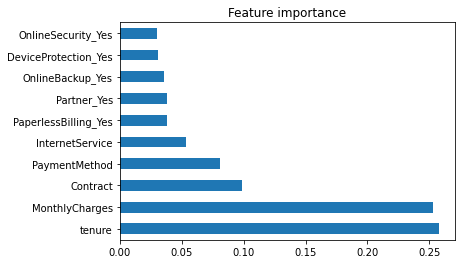

In [71]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance")
plt.show()

## Feature Selection Using RandomForest Classifier 

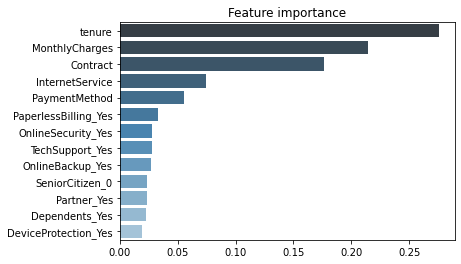

In [72]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}


# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


* Both RandomForest and ExtraTreesClassifier listed out top 10 important features. Most of the features are identical in both lists. 
* I would choose top 5 features in both lists in our model training later since after first 5 features, the importance of the last 10 features are similar and weak. 

## Oversampling Using SMOTNC Method 

In our EDA section, we have noticed that our datasets is imbalanced meaning the numer of minority class is much smaller than majority class. This could lead to biased results since Machine learning models will predict majority class most of time. 

To overcome this issue, I will use smotnc method oversamling our minority class to make the datasets balance. 

In [73]:
! pip install imbalanced-learn

You should consider upgrading via the '/Users/vivianzheng/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [74]:
#Using only important features to train our model 
y_new = df['Churn']
X_new = df[['tenure','MonthlyCharges','Contract','InternetService','PaymentMethod']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_new, y_new, test_size=0.7, random_state=42)


In [75]:
#oversamplying minority class
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features= [2,3,4], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Modeling 

* Through feature engineering and feature selection, our data is ready to be trained by varies models.
* In the following steps, I will train our data with classifiers listed below: 
    * Logistic regression 
    * XGBoost 
    * SVM 
    * Naive Bayes
* To improve our models performance, I will perform GridSearch to tune hyperparameter of each model and compare model performance between them using classification report metrics and ROC curve . 

* Lastly, I will use PCA model as another way of feature selecting and train the feature_reducted training datasets with classifiers metioned above and compare model performance using classification report metrics and ROC curve. 
    

In [76]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [77]:
#Models Package imports 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Logistic Regression

In [78]:
LR = LogisticRegression()
#fit training data 
LR.fit(X_resampled, y_resampled)

prediction = LR.predict(X_test)

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction)) # accuracy is 75%

[[1079  251]
 [1098 2503]]
              precision    recall  f1-score   support

           0       0.50      0.81      0.62      1330
           1       0.91      0.70      0.79      3601

    accuracy                           0.73      4931
   macro avg       0.70      0.75      0.70      4931
weighted avg       0.80      0.73      0.74      4931



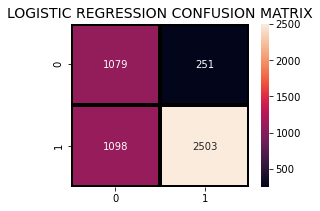

In [79]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

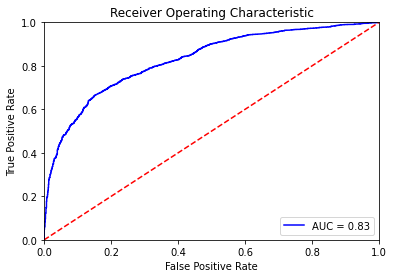

In [80]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression With GridSearch**

To get the best set of hyperparameters we can use Grid Search. Grid Search passes all combinations of hyperparameters one by one into the model and check the result. Finally it gives us the set of hyperparemeters which gives the best result after passing in the model.

In [81]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


LR_GS= GridSearchCV(LR, param_grid = LRparam_grid ,refit=True,verbose=3)
LR_GS.fit(X_resampled, y_resampled)
print("Best parameters for LogisticRegression:", LR_GS.best_params_)


Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.499 total 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, pena

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, sc

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, pena

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, sc

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.729 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.754 total time= 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, scor

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.754 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=liblinear;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.729 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.754 total time= 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.751 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=libline

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.740 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.733 total time=  

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, sco

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.751 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.736 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=libline

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.739 t

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.740 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, scor

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.727 total

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.738 total

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[C

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.736 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.737 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.766 total time= 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.740 total

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.766 total

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.727 to

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.738 total t

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.738

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.741 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.766 tota

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, s

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=libline

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=sag;, s

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total tim

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=liblinear;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.740 total ti

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.740 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, sol

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;, scor

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.741 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=liblinea

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train

[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.740 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.727 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.731 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.738 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.741 total time=   0.0

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.5               nan 0.5        0.75048225
 0.75048225 0.75048275 0.75048225 0.75048225        nan        nan
 0.5               nan 0.50031797 0.75048225 0.75048225 0.75048275
 0.75048225 0.75048225        nan        nan 0.5               nan
 0.49968203 0.75048225 0.75048225 0.75048275 0.75048225 0.75048225
        nan        nan 0.5               nan 0.50031797 0.75048225
 0.75048225 0.75048275 0.75048225 0.75048225        nan        nan
 0.5               nan 0.5        0.75048225 0.75048225 0.75048275
 0.75048225 0.75048225        nan        nan 0.5               nan
 0.5        0.75048225 0.75048225 0.75048275 0.75048225 0.75048225
        nan        nan 0.5               nan 0.49968203 0.75048225
 0.75048225 0.75048275 0.75048225 0.75048225        nan        nan
 0.75397633        nan 0.75111969 0

In [82]:
print("Best parameters for LogisticRegression:", LR_GS.best_params_)

Best parameters for LogisticRegression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [83]:
LR_GS_1 = LogisticRegression(C = 0.01, max_iter= 100, penalty= 'l2',solver= 'liblinear')
LR_GS_1.fit(X_resampled, y_resampled)

LogisticRegression(C=0.01, solver='liblinear')

In [84]:
prediction_GS = LR_GS_1.predict(X_test)

print(classification_report(y_test,prediction_GS)) # accuracy is 76% but did not improve the model predict ability 

              precision    recall  f1-score   support

           0       0.48      0.84      0.61      1330
           1       0.92      0.67      0.77      3601

    accuracy                           0.72      4931
   macro avg       0.70      0.75      0.69      4931
weighted avg       0.80      0.72      0.73      4931



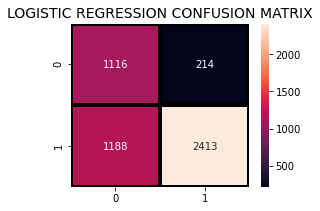

In [85]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction_GS),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

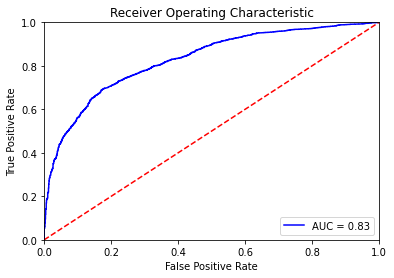

In [86]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LR_GS_1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression Feature Importances 

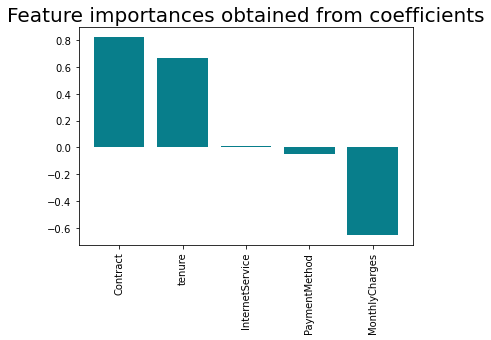

In [87]:
importances = pd.DataFrame(data={
    'Attribute': X_resampled.columns,
    'Importance': LR_GS_1.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## XGBOOST

In [88]:
xgb = XGBClassifier(eval_metric = 'auc')
xgb.fit(X_resampled, y_resampled)
prediction_xgb = xgb.predict(X_test)

print(classification_report(y_test,prediction_xgb)) #accurancy 75%


/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1330
           1       0.86      0.78      0.82      3601

    accuracy                           0.75      4931
   macro avg       0.69      0.72      0.70      4931
weighted avg       0.77      0.75      0.75      4931



In [89]:
#parameters for xgboost

params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}
gs_xgb = GridSearchCV(xgb, param_grid=params_xgb)
gs_xgb.fit(X_resampled, y_resampled)

print("Best parameters for XGBoost:", gs_xgb.best_params_)

/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/vivianzheng/opt/anaconda3/lib/python3.8/site-packag

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100}


In [90]:
print("Best parameters for XGBoost:", gs_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100}


In [91]:
xgb1 = XGBClassifier(learning_rate = 0.5, max_depth = 8, n_estimators = 100)
xgb1.fit(X_resampled, y_resampled)
prediction_xgb1 = xgb1.predict(X_test)
print(classification_report(y_test,prediction_xgb1))

[12:03:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      1330
           1       0.85      0.80      0.82      3601

    accuracy                           0.75      4931
   macro avg       0.69      0.71      0.70      4931
weighted avg       0.77      0.75      0.76      4931



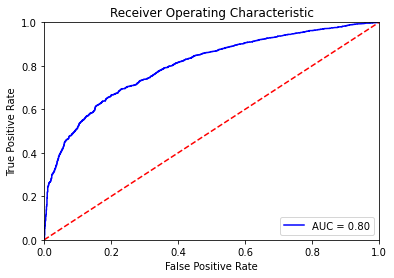

In [92]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost Feature Importance 

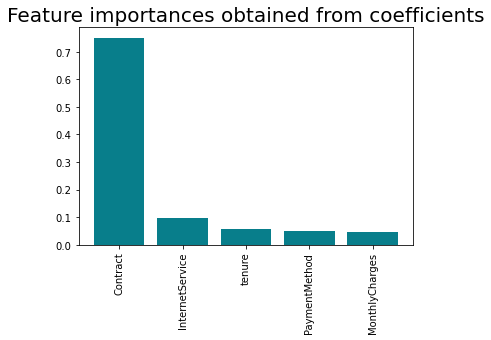

In [93]:
importances = pd.DataFrame(data={
    'Attribute': X_resampled.columns,
    'Importance': xgb1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## SVM

In [94]:
model_SVM = SVC()
model_SVM.fit(X_resampled, y_resampled)
prediction_SVM = model_SVM.predict(X_test)
print(classification_report(y_test, prediction_SVM))


              precision    recall  f1-score   support

           0       0.47      0.85      0.61      1330
           1       0.92      0.65      0.76      3601

    accuracy                           0.71      4931
   macro avg       0.70      0.75      0.69      4931
weighted avg       0.80      0.71      0.72      4931



In [95]:
param_grid = param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

SVM_1= GridSearchCV(model_SVM, param_grid , 
                  refit = True, verbose = 3)
SVM_1.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.789 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.790 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.716 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [96]:
print("Best parameters for SVM:", SVM_1.best_params_)

Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [97]:
SVM_2 = SVC(C= 10, gamma = 1, kernel= 'rbf')
SVM_2.fit(X_resampled, y_resampled)

prediction_svm = SVM_2.predict(X_test)
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61      1330
           1       0.91      0.70      0.79      3601

    accuracy                           0.73      4931
   macro avg       0.70      0.75      0.70      4931
weighted avg       0.79      0.73      0.74      4931



## SVM Feature Importance 

<function matplotlib.pyplot.show(*args, **kw)>

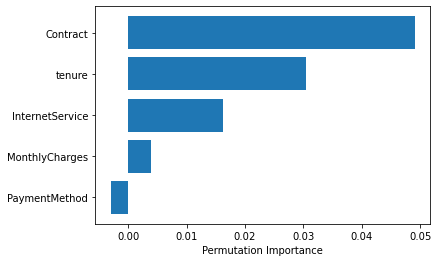

In [98]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(SVM_2, X_test, y_test)
features = X_resampled.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show

## Naive Bayes


In [102]:
NB_prediction= GaussianNB().fit(X_resampled, y_resampled).predict(X_test)
print(confusion_matrix(y_test,NB_prediction))
print(classification_report(y_test,NB_prediction))



[[1147  183]
 [1345 2256]]
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      1330
           1       0.92      0.63      0.75      3601

    accuracy                           0.69      4931
   macro avg       0.69      0.74      0.67      4931
weighted avg       0.80      0.69      0.71      4931



In [103]:
#parameters for xgboost

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gs_NB = GridSearchCV(GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
gs_NB.fit(X_resampled, y_resampled)

print("Best parameters for NaiveBayes:", gs_NB.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters for NaiveBayes: {'var_smoothing': 0.0012328467394420659}


In [107]:

NB_2 = GaussianNB(var_smoothing = 0.0012328467394420659)
NB_2.fit(X_resampled, y_resampled)

NB_2_prdiction = NB_2.predict(X_test)
print(classification_report(y_test,NB_2_prdiction))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60      1330
           1       0.92      0.63      0.75      3601

    accuracy                           0.69      4931
   macro avg       0.69      0.74      0.67      4931
weighted avg       0.80      0.69      0.71      4931



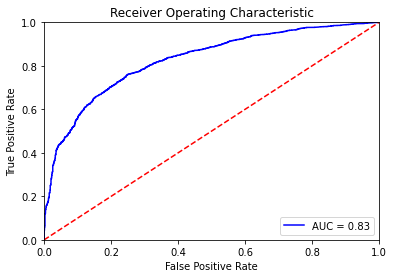

In [108]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = NB_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## PCA Analysis 

We can use Principal components analysis as a way to reduce dimensions of datasets as well. 
Principal components analysis (PCA) [9] is a classical method that provides a sequence of best linear approximations to a given highdimensional observation. PCA is a way of identifying patterns in data, and expressing the data in such a way as to highlight their similarities and differences. 

Naive Bayes
[[ 350  217]
 [ 263 1283]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       567
           1       0.86      0.83      0.84      1546

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.77      0.78      2113



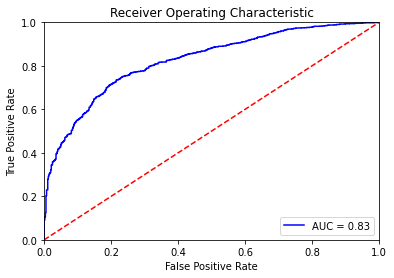

SVM
[[ 246  321]
 [ 119 1427]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.53       567
           1       0.82      0.92      0.87      1546

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Random Forest
[[ 275  292]
 [ 156 1390]]
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       567
           1       0.83      0.90      0.86      1546

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



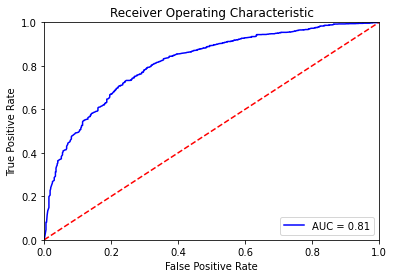

Logistic Regression
[[ 272  295]
 [ 139 1407]]
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       567
           1       0.83      0.91      0.87      1546

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



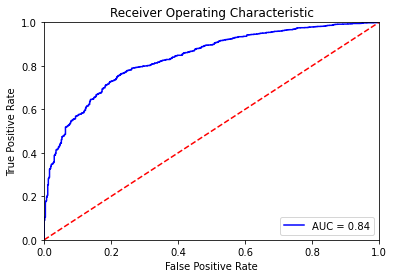

In [110]:
Y = df['Churn']
X = df.drop('Churn', 1)

pca = PCA(n_components=5,svd_solver='full')
X_pca = pca.fit_transform(X)



X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)



trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = SVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)



print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = trainednb.predict_proba(X_test_reduced)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_Test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))


print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

probs = trainedforest.predict_proba(X_test_reduced)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_Test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

probs = trainedmodel.predict_proba(X_test_reduced)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_Test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion 

Main Take Away: 
* New customers staying with service less than 20 months are highly volatile to leave the service
* Customers with Monthly charge between 80 and 100 are likely to churn 
* Expensive Fiber optic of Internet Service disappointed customer causing customer leave 

Recommendations:
* Company should constantly ask for feedback and send emails to build friendly relationships with new customers and encourage them to sign the yearly contract by providing coupon or promotion or customer favorable yearly contract price in order to retain users
* Company could interview customers who use Fiber optic internet service to collect user experience to gain insights on how to improve the internet service. 

Classification Model: 
* Among all the models trained above, the logistic regression classifier gives us the best results in terms of F1-score of 0.79 and AUC score of 0.84. 

Acquiring a new customer is much harder than keeping an existing customer regarding the time and effort taken. Therefore, being able to predict which customers are at high risk of churn and provide customized strategies for those customer segments are extremely important for companies to sustain business and even thrive. 

One good way to understand and predict customer churn is to analyze historical customer behavior and demographic data and discover possible reasons why they left and investigate it further by interviewing customers who have already churned to understand reasons for leaving. By doing so, the company proactively avoids future customer churn and improves product and business. 